# 

1. Content-Related: **Data Preprocessing Treatment (DPT)** rather than ML/AI implementation!
\
&nbsp;
2. Main Business Concept (CHURN): Churn rate, sometimes known as attrition rate, **is the rate at which customers stop doing business with a company over a given period of time**. Churn may also apply to the number of subscribers who cancel or don't renew a subscription. The higher your churn rate, the more customers stop buying from your business (https://www.salesforce.com/resources/articles/how-calculate-customer-churn-and-revenue-churn.)
\
&nbsp;

# Set-up

In [1044]:
# Commonly used libraries
import numpy as np 
import pandas as pd 
import os

#fixing 1st error
!pip install xgboost   



# From scikitlearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# From imbalancedlearn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# For plotting - matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# For plotting - other
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

# Other
from xgboost import XGBClassifier

# Loanding data

In [1046]:
df = pd.read_excel('Telco_customer_churn.xlsx')     #fixing 2nd error


In [1047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Things we have:

- Services and contract customers have
- Lifetime of customer
- Payment-related information
- Demographics information
- Reasons for churn

Type of variables:
- Integers
- Float
- Objects

**Missing value!!!**

In [1049]:
# Before we proceed, let's "fix" the "Total Charges" type
# It has an object type, but let's modify the type to numeric, as "money is money - numbers, right?"

In [1050]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Checking and Handling Missing Values

In [1052]:
# Let's check where are the missing values

In [1053]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [1054]:
# About the "Churn Reason": 
# Most clients did not churn, and that migth be way there is no reason...
# Let's check the amount of customers that churn, per ID

In [1055]:
# Extra DPT Step 1: Feature Engineering
df['MonthlyTenureRatio'] = df['Monthly Charges'] / (df['Tenure Months'] + 1)


In [1056]:
df[['Monthly Charges', 'Tenure Months', 'MonthlyTenureRatio']].head()


,Monthly Charges,Tenure Months,MonthlyTenureRatio
0,53.85,2,17.950000
1,70.70,2,23.566667
2,99.65,8,11.072222
3,104.80,28,3.613793
4,103.70,49,2.074000


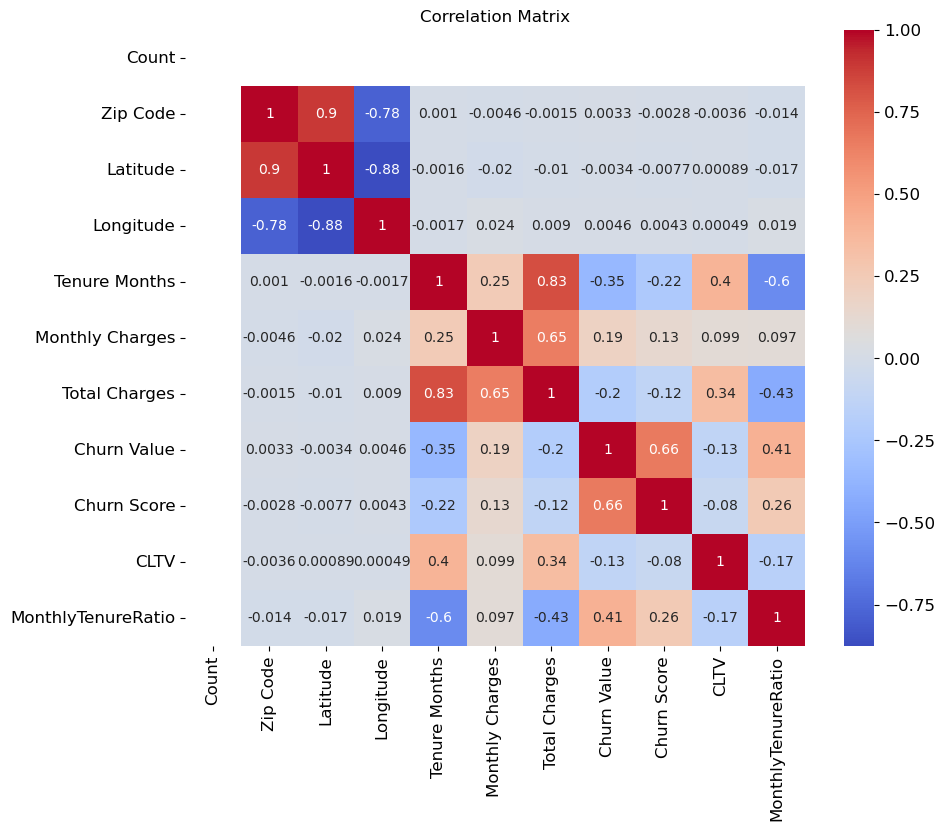

In [1057]:
# Extra DPT Step 2: Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [1058]:
df = df.drop(['Total Charges', 'Latitude'], axis=1)


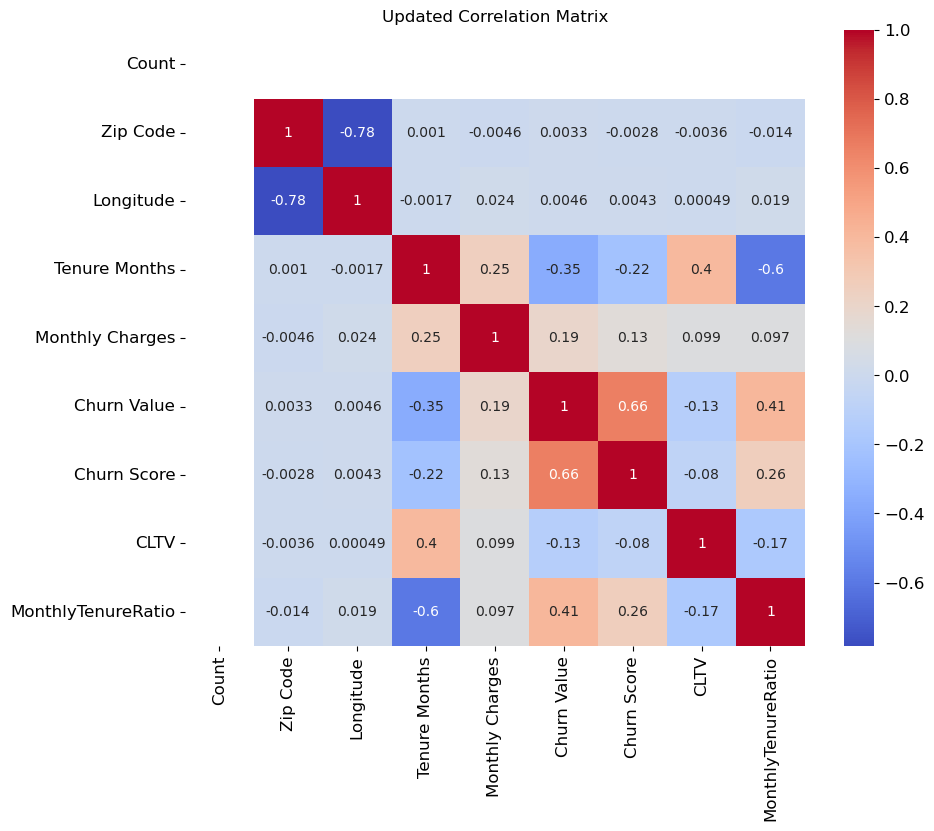

In [1059]:
# New corelation matrix after the drop:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Updated Correlation Matrix")
plt.show()


In [1060]:
#Fixing 3rd error
print(df.columns)
df.groupby('Churn Label')['CustomerID'].nunique() 



Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'MonthlyTenureRatio'],
      dtype='object')


Churn Label
No     5174
Yes    1869
Name: CustomerID, dtype: int64

In [1061]:
# We can notice that the amount of "non-reasons" is equal to the amount of customers that did not churn.
# So, nothing to do here.
# What about the other variable ("Total Charges")?

In [1062]:

print(df.columns)

df.columns = df.columns.str.replace(' ', '', regex=False)


df.columns = df.columns.str.strip()




Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'MonthlyTenureRatio'],
      dtype='object')


In [1063]:
df['TotalCharges'] = df['MonthlyCharges'] * df['TenureMonths']




In [1064]:
df.columns = df.columns.str.strip().str.replace(" ", "").str.replace("\u200b", "")



In [1065]:

df[df['TotalCharges'].isna()]


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Longitude,Gender,SeniorCitizen,...,PaperlessBilling,PaymentMethod,MonthlyCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyTenureRatio,TotalCharges


In [1066]:
# All of them are "No Churn"
# Almost all has a 2-year contract (only 1 with 1-year)

The dataset includes information about the customer's tenure (Tenure Months) and monthly charges (Monthly Charges).

Let's determine whether we can replace these values with those derived from monthly charges.

We know how many months a customer has been using the service, so we can determine if the calculation monthly charges multiplied by the number of months the customer has been using the service is equal to the total charges.

Let us test it!

In [1068]:
# Calculating the charges
df['calc_charges'] = df['MonthlyCharges'] * df['TenureMonths']


In [1069]:
# The difference between that and total charges
df['diff_in_charges'] = df['TotalCharges'] - df['calc_charges']


In [1070]:
import plotly.express as px

fig = px.histogram(df, x='diff_in_charges', color='Contract', marginal='box')
fig.show()


The graph shows the discrepancy between our customers' real total chargers and the new column computed by multiplying the monthly chargers by the number of months.

The median difference is up to $1 for all contract types, meaning that for 50\% of clients, prices calculated by multiplying monthly charges by the number of months in the service equal the total charges in the dataset.

In [1072]:
# Another analysis we can do relates to check the difference with respect to the amount of examples
# So, we compute the quantiles in the two columns ("total charges", "diff_in_charges") per type of contract
df.groupby('Contract')[['TotalCharges', 'diff_in_charges']].quantile([.50, .80, .90, .95])


TotalCharges  diff_in_charges
Contract                                          
Month-to-month 0.50        686.25              0.0
               0.80       2500.08              0.0
               0.90       3855.50              0.0
               0.95       4979.13              0.0
One year       0.50       2665.70              0.0
               0.80       5253.36              0.0
               0.90       6292.92              0.0
               0.95       7067.14              0.0
Two year       0.50       3604.00              0.0
               0.80       6388.54              0.0
               0.90       7471.65              0.0
               0.95       7934.04              0.0

The difference is less than 10% of the median total charges for 95% of consumers. In this scenario, it seems ok to substitute missing total charges with monthly charges and not delete these rows.

In [1074]:


df['TotalCharges'] = np.where(df['TotalCharges'].isna() == True, df['calc_charges'], df['TotalCharges'])
# Then, we delete the supporting columns we had created
df = df.drop(['calc_charges', 'diff_in_charges'], axis=1)


# Visualizing and Getting Insights from Data
 
### 1.  About the target

In [1076]:
fig = px.pie(
    df.groupby('ChurnLabel')['CustomerID'].nunique().reset_index(),
    values='CustomerID',
    names='ChurnLabel'
)
fig.show()


26.5% of the customers churn

73.5% did not churn

<img src="customers-at-risk.jpg" style="width:400px;height:250px;">

**Customer Relationship Management (CRM) Metrics**

- Retention
- CLV
- Credit Risk
- Acquisiton
- Etc. Etc. Etc.

### 2.  Demographics (Geographical Location)

In [1081]:
df.groupby(['Country','State'])['CustomerID'].count()

Country        State     
United States  California    7043
Name: CustomerID, dtype: int64

In [1082]:
df['City'].nunique()

1129

In [1083]:

df[['Latitude', 'Longitude']] = df['LatLong'].str.split(',', expand=True)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)


In [1084]:
# Most customers are in the Los Angeles, San Diego, San Francisco area.
fig = px.bar(df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID', 
             ascending=False).head(50),
             x='City',
             y='CustomerID', 
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

### 3.  Customer Lifetime

I think it's crucial to analyze how long consumers have used the service and how many months they stay before looking at what services they've utilized and their other qualities.

Let's see how many months the churned customers used our service and when the most stopped utilizing it.

In [1087]:
fig = px.histogram(
    df,
    x="TenureMonths",
    color="ChurnLabel",
    marginal="box"
)
fig.show()


In [1088]:

df.groupby('ChurnLabel')['TenureMonths'].quantile([.50, .75, .90, .95])


ChurnLabel      
No          0.50    38.0
            0.75    61.0
            0.90    71.0
            0.95    72.0
Yes         0.50    10.0
            0.75    29.0
            0.90    51.0
            0.95    60.0
Name: TenureMonths, dtype: float64

In [1089]:
df.groupby('ChurnLabel')['TenureMonths'].mean()


ChurnLabel
No     37.569965
Yes    17.979133
Name: TenureMonths, dtype: float64

50% of consumers quit within 10 months. After 5 months, client turnover stops falling dramatically.

The client's lifespan before churn is crucial, as the first months of service are the riskiest due to consumer expectations.

In [1091]:
# Reasons for Churn

fig = px.bar(
    df.groupby(['ChurnReason'])['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False),
    x='ChurnReason',
    y='CustomerID',
    color='CustomerID',
    text='CustomerID'
)
fig.show()

# Reasons:
# "I don't know"
# 33.2% Because the competition had the greatest offer (speed, data, devices).
# 17.3% Support specialist or provider attitude.
# Relocation is another cause of churn we cannot control. 

### Since there is minimal data and they are irrelevant to customer retention, I will remove them from the dataset.

In [1092]:
df = df[df['ChurnReason'] != 'Moved']
df = df[df['ChurnReason'] != 'Deceased']

We can now analyze our customer profile data to determine which kind of clients are most likely to leave and what we can do.

Although customer survey data is subjective, we just saw the reasons why the said they left. 

Now, let's see reasons for churn: BASED ON DATA!

#### Contract Types & Charges

In [1095]:
# Types of contract:
fig = px.histogram(df, x="ChurnLabel", color="Contract", barmode="group", title="Number of customers by contract type")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [1096]:
fig = px.pie(df.groupby(['Contract','ChurnLabel'])['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Contract',
            facet_col = 'ChurnLabel',
            title = 'Churn rate by contract type')
fig.show()

Month-to-month contracts accounted for 88.7% of service cancellations.

Perhaps longer contracts have penalties for early termination, or these are mostly consumers that tried the service and were unsatisfied.

In [1098]:
df.groupby(['Contract','ChurnLabel'])['TenureMonths'].mean()

Contract        ChurnLabel
Month-to-month  No            21.033333
                Yes           14.045455
One year        No            41.674063
                Yes           45.064103
Two year        No            56.602914
                Yes           61.270833
Name: TenureMonths, dtype: float64

Month-to-month contracts have the minimum average lifespan for active clients.This may be a service-specific contract, or users may move to longer contracts after using the service.

In [1100]:
# Total Charges
fig = px.histogram(df, x="TotalCharges", color="ChurnLabel", marginal="box")
fig.show()

The median charges of churned customers are more than 2 times lower than those of service users.

Customers who quit utilizing the service may not have been financially unstable. within all, we know that many consumers quit within 5 months.

In [1102]:
# Monthly Charges
fig = px.histogram(df, x="MonthlyCharges", color="ChurnLabel", marginal="box")
fig.show()

In [1103]:
df.groupby('ChurnLabel')['MonthlyCharges'].quantile([.50,.75,.95,.99])

ChurnLabel      
No          0.50     64.4250
            0.75     88.4000
            0.95    108.4175
            0.99    115.1000
Yes         0.50     79.5750
            0.75     94.2375
            0.95    105.6500
            0.99    111.1910
Name: MonthlyCharges, dtype: float64

That's it! Former clients had greater median monthly charges than existing customers. Since we didn't link high churn to the client's location in the earlier steps, this may be related to services and so on. We'll discover!

#### Services used by clients

We have a flag for each service telling us which service the customer is using.
* Phone Service
* Internet Service
* Online Security
* Online Backup 
* Device Protection
* Multiple Lines
* Tech Support
* Streaming TV
* Streaming Movies

The list is long, so let's focus on the ones with high correlation to churn!

In [1107]:
corr_df = df.copy()

In [1108]:
corr_df['ChurnLabel'].replace(to_replace='Yes', value=1, inplace=True)
corr_df['ChurnLabel'].replace(to_replace='No',  value=0, inplace=True)

C:\Users\megum\AppData\Local\Temp\ipykernel_12148\2463299772.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\megum\AppData\Local\Temp\ipykernel_12148\2463299772.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [1109]:
df_dummies = pd.get_dummies(corr_df[['ChurnLabel','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                 'StreamingMovies']])
df_dummies.head()

,ChurnLabel,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,False,True,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,1,False,True,False,False,True,False,True,False,True,...,True,True,False,False,False,False,True,False,False,True
5,1,False,True,True,False,False,True,False,False,True,...,True,False,False,True,True,False,False,True,False,False
6,1,True,False,False,True,False,True,False,False,True,...,True,True,False,False,True,False,False,False,False,True
7,1,False,True,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False


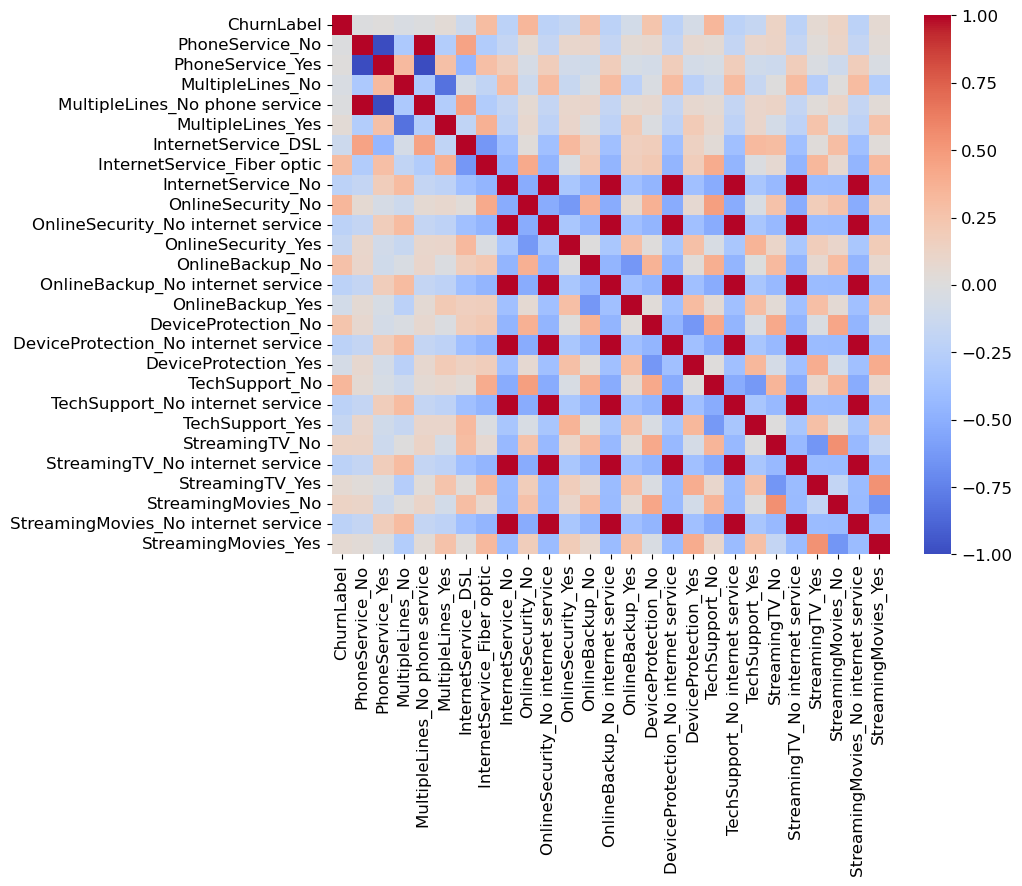

In [1110]:
plt.figure(figsize=(9, 7))
sns.heatmap(df_dummies.corr(), annot=False, cmap='coolwarm')

plt.show()

In [1111]:
fig = px.bar(df_dummies.corr()['ChurnLabel'].sort_values(ascending = False), 
             color = 'value')
fig.show()

In [1112]:
# Internet Services

In [1113]:
# Types of Internet services
fig = px.bar(df.groupby('InternetService')['CustomerID'].count().reset_index(),
             x='InternetService',
             y='CustomerID', 
             color = 'InternetService',
             text = 'CustomerID')
fig.show()

In [1114]:
# Internet services used by customers that churned
fig = px.pie(df.groupby(['InternetService','ChurnLabel'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'ChurnLabel',
             names='InternetService',
             title = 'What type of internet was connected to the clients who left the service?')
fig.show()

69% of individuals who left the service had fiber optic Internet.

Isn't fiber optic Internet superior than DSL. What's wrong?

According to Google, this Internet is more expensive and rare. We won't get into details, but 70% of those who stopped utilizing the service were fiber optic Internet users.

In [1116]:
# Tech Support

In [1117]:
fig = px.bar(df.groupby(['InternetService','TechSupport','ChurnLabel'])['CustomerID'].count().reset_index(),
             x="InternetService",
             y="CustomerID", 
             color="ChurnLabel", 
             text = 'CustomerID',
             barmode="group",
             facet_col="TechSupport"
            )
fig.show()

In [1118]:
fig = px.pie(df.groupby(['TechSupport','ChurnLabel'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'ChurnLabel',
             hole = .5,
             names='TechSupport',
             title = 'Tech support option and churn')
fig.show()

77.5% of customers that churned did not activate tech help. Additionally, active customers are evenly dispersed and there is no notable shift toward the absence of this choice.

In [1120]:
# Online Security

In [1121]:
fig = px.bar(df.groupby(['InternetService','OnlineSecurity', 'ChurnLabel'])['CustomerID'].count().reset_index(),
             x="InternetService",
             y="CustomerID", 
             color="ChurnLabel", 
             text = 'CustomerID',
             facet_col = 'OnlineSecurity'
            )
fig.show()

# The option reduces churn regardless of Internet type.

In [1122]:
# So far:

# lowest attrition rate among customers without Internet services (fewer such customers)
# 69.2% of churn clients were linked to fiber optic Internet 
# the absence of connected technical help and online security alternatives correlated with churn

#### Payment Methods used by clients

In [1124]:
fig = px.bar(df.groupby(['PaymentMethod','ChurnLabel'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="PaymentMethod", 
             color="ChurnLabel", 
             text = 'CustomerID'
            )
fig.show()

# Electronic check consumers have a 50% churn rate.
# Other methods generically lower!

In [1125]:
# Let's see if electronic check consumers used a specific Internet service.
fig = px.bar(df.groupby(['PaymentMethod','InternetService'])['CustomerID'].count().reset_index(),
             x='PaymentMethod',
             y='CustomerID', 
             facet_col = 'InternetService',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

In [1126]:
# Let's compare Internet service and payment method turnover rates:
churn_pm = df.assign(churn_clients = np.where(df['ChurnLabel']== 'Yes',df['CustomerID'],None))\
   .groupby(['PaymentMethod','InternetService']).agg({'churn_clients':'count'}).reset_index()

In [1127]:
pm_clients = df.groupby(['PaymentMethod','InternetService'])['CustomerID'].count().reset_index()

In [1128]:
pm_data = pm_clients.join(churn_pm.set_index(['PaymentMethod','InternetService']), on=['PaymentMethod','InternetService'])

In [1129]:
pm_data

,PaymentMethod,InternetService,CustomerID,churn_clients
0,Bank transfer (automatic),DSL,564,51
1,Bank transfer (automatic),Fiber optic,639,180
2,Bank transfer (automatic),No,330,16
3,Credit card (automatic),DSL,593,71
4,Credit card (automatic),Fiber optic,594,148
5,Credit card (automatic),No,331,9
6,Electronic check,DSL,645,204
7,Electronic check,Fiber optic,1565,819
8,Electronic check,No,122,15
9,Mailed check,DSL,607,121


In [1130]:
pm_data['churn_rate,%'] = round(((pm_data['churn_clients']/pm_data['CustomerID']) * 100),2)

In [1131]:
fig = px.bar(pm_data.sort_values('churn_rate,%'),
             x='churn_rate,%',
             y='PaymentMethod',
             facet_col = 'InternetService',
             color = 'churn_rate,%',
             text = 'churn_rate,%')
fig.show()

For fiber optic internet, all payment methods have greater churn rates, but electronic and mailed checks have the greatest.Even for Internet DSL, these payment methods are churning more.

At this point, electronic check customers have the greatest turnover rate. All online services exhibit this tendency, but optical fiber Internet users exhibit it more.

#### Gender, Age and Other Demographics

In [1134]:
# Gender
fig = px.pie(df.groupby('Gender')['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Gender',
            color_discrete_sequence=px.colors.sequential.RdBu,
            title = 'Distribution of the clients by gender')

fig.show()

In [1135]:
fig = px.bar(df.groupby(['Gender',
                                    'ChurnLabel'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Gender", 
             color="ChurnLabel", 
             text = 'CustomerID'
            )
fig.show()

In [1136]:
# Not much difference in gender...

In [1137]:
# Age - Senior Citizen?
fig = px.pie(df.groupby(['SeniorCitizen','ChurnLabel'])['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='ChurnLabel',
            facet_col = 'SeniorCitizen',
            color = 'ChurnLabel',
            title = 'Churn rate by customer age')

fig.show()

# Seniors churn approximately twice as much as non-seniors. However, such customers are rarer.

In [1138]:
df.groupby('SeniorCitizen')['CustomerID'].count()

SeniorCitizen
No     5852
Yes    1132
Name: CustomerID, dtype: int64

In [1139]:
# Partners or Dependents
fig = px.bar(df.groupby(['SeniorCitizen','Partner', 'Dependents','ChurnLabel'])['CustomerID'].count().reset_index(),
             x="SeniorCitizen",
             y="CustomerID", 
             color="ChurnLabel", 
             #barmode="group",
             facet_row="Partner",
             facet_col = 'Dependents'
            )
fig.show()

# Seniors without partners and dependents have a nearly 50% churn rate.
# Summarize and develop a churn prediction model after seeing which services seniors used.

In [1140]:
fig = px.bar(df.groupby(['SeniorCitizen','InternetService','ChurnLabel'])['CustomerID'].count().reset_index(),
             x="InternetService",
             y="CustomerID", 
             color="ChurnLabel", 
             barmode="group",
             facet_col = 'SeniorCitizen'
            )
fig.show()

# The biggest churn rate is among seniors, who were more likely to use optical fiber Internet.

# Analyzing the data taught us:
   # The lowest churn rate among customers without Internet services (but there are fewer such customers) 
   # 69.2% of the clients in the churn were connected to the fiber optic Internet 
   # The absence of connected technical support and online security options correlates with the churn variable 
   # The highest churn rate is for customers with an electronic check, regardless of the type of Internet services

### 3.  Preparing Data for Model
#### A.  Deleting the Columns -- Not to use!

In [1142]:
df = df.drop(['Country','State','Count','ZipCode','ChurnReason','City','ChurnScore','ChurnValue','CLTV','CustomerID','LatLong',
                  'Latitude','Longitude'], axis = 1)

In [1143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6984 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              6984 non-null   object 
 1   SeniorCitizen       6984 non-null   object 
 2   Partner             6984 non-null   object 
 3   Dependents          6984 non-null   object 
 4   TenureMonths        6984 non-null   int64  
 5   PhoneService        6984 non-null   object 
 6   MultipleLines       6984 non-null   object 
 7   InternetService     6984 non-null   object 
 8   OnlineSecurity      6984 non-null   object 
 9   OnlineBackup        6984 non-null   object 
 10  DeviceProtection    6984 non-null   object 
 11  TechSupport         6984 non-null   object 
 12  StreamingTV         6984 non-null   object 
 13  StreamingMovies     6984 non-null   object 
 14  Contract            6984 non-null   object 
 15  PaperlessBilling    6984 non-null   object 
 16  PaymentMeth

#### B.  Encoding Categorical Variables

In [1145]:
df['ChurnLabel'].replace(to_replace='Yes', value=1, inplace=True)
df['ChurnLabel'].replace(to_replace='No',  value=0, inplace=True)

C:\Users\megum\AppData\Local\Temp\ipykernel_12148\3074702856.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\megum\AppData\Local\Temp\ipykernel_12148\3074702856.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [1146]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [1147]:
df = df.apply(lambda x: encode_data(x))
df.head()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,ChurnLabel,MonthlyTenureRatio,TotalCharges
0,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,1,17.950000,107.70
4,1,0,0,1,49,1,2,1,0,2,...,0,2,2,0,1,0,103.70,1,2.074000,5081.30
5,0,0,1,0,10,1,0,0,0,0,...,2,0,0,0,0,1,55.20,1,5.018182,552.00
6,1,1,0,0,1,0,1,0,0,0,...,0,0,2,0,1,2,39.65,1,19.825000,39.65
7,1,0,0,0,1,1,0,2,1,1,...,1,1,1,0,0,3,20.15,1,10.075000,20.15


In [1148]:
# Let's check correlation
fig = px.bar(df.corr()['ChurnLabel'].sort_values(ascending = False),
             color = 'value')
fig.show()

#### C.  Scaling Data

In [1150]:
# Using Min and Max

# define min max scaler
scaler = MinMaxScaler()

# transform data. Fixed 4th error data 1111 error
data1 = df
numeric_df = df.select_dtypes(include=['int64', 'float64'])
scaled = scaler.fit_transform(numeric_df)

print(scaled)

[[0.02777778 0.35422886 1.         0.21946369 0.01259649]
 [0.68055556 0.85024876 1.         0.02245582 0.59430409]
 [0.13888889 0.36766169 1.         0.05899065 0.0645614 ]
 ...
 [1.         0.84527363 0.         0.01426204 0.86905263]
 [0.15277778 0.11293532 0.         0.02732849 0.03808187]
 [0.91666667 0.86965174 0.         0.0162868  0.81554386]]


In [1151]:
# Using Standardization

# define standard scaler
scaler = StandardScaler()

# transform data
data2 = df
scaled2 = scaler.fit_transform(data2)
print(scaled2)

[[ 0.99059406 -0.43981603 -0.96786985 ...  1.6907287   1.41740434
  -0.96070415]
 [ 0.99059406 -0.43981603 -0.96786985 ...  1.6907287  -0.42103849
   1.23278412]
 [-1.00949525 -0.43981603  1.03319677 ...  1.6907287  -0.08010186
  -0.76475618]
 ...
 [-1.00949525 -0.43981603  1.03319677 ... -0.59146095 -0.49750147
   2.26879893]
 [-1.00949525 -0.43981603  1.03319677 ... -0.59146095 -0.37556764
  -0.86460452]
 [ 0.99059406 -0.43981603 -0.96786985 ... -0.59146095 -0.47860671
   2.06702941]]


#### D.  Balancing Data

**SMOTE** algorithmically oversamples the minority class in an imbalanced dataset for binary classification. **SMOTE** synthesizes minority samples. It finds its k-nearest neighbors in feature space by selecting a minority class sample. Interpolating between the selected sample and its k-nearest neighbors yields synthetic samples. **SMOTE** generates new samples by randomly selecting one of the k-nearest neighbors and computing the difference between it and the original sample. This difference is multiplied by a random value between 0 and 1 and added to the original sample to form the synthetic sample.

In [1154]:
df.groupby('ChurnLabel')['ChurnLabel'].count()


ChurnLabel
0    5174
1    1810
Name: ChurnLabel, dtype: int64

In [1155]:
#Strategy is 1 - Because we want to oversampling from "Churn - Class 1"
over = SMOTE(sampling_strategy = 1)

x = df.drop("ChurnLabel", axis = 1).values
y = df['ChurnLabel'].values

In [1156]:
x,y = over.fit_resample(x,y)

### 4.  Training and Testing 

In [1158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)

In [1159]:
def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    method.fit(x_train, y_train)
    
    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)
    
    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)
    
    # Plot confusion matrix with labeled counts and percentages
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
    
    # Evaluate model performance and print results
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

In [1160]:
# Using Extreme Gradient Boosting Classifier
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 4,n_estimators = 1000)

ROC AUC:  86.82%
Model accuracy:  86.81%
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1047
           1       0.86      0.87      0.87      1023

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



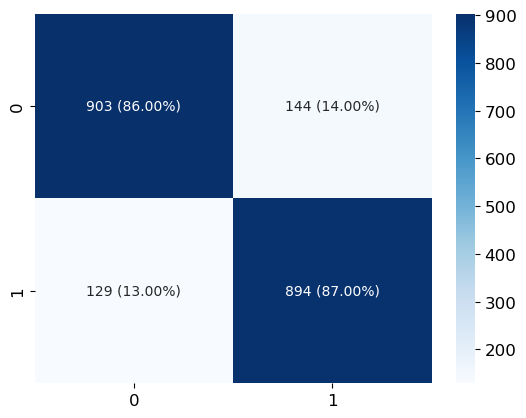

In [1161]:
# Confusion Matrix: TN/FP // FN/TP
# Precision: TP / (TP+FP)
# Recall: TP / (TP+FN)
# F1: 2* ( (Precision * Recall) / (Precision + Recall) )
# Support: It indicates the number of examples of each particular class in the true responses (responses in your test set).
model(xgb,x_train,y_train,x_test,y_test)

In [1162]:
## Regression Models for Churn Score Prediction

In [1163]:
# Örnek: ChurnScore'u yeniden oluştur
df['ChurnScore'] = df['MonthlyTenureRatio'] * df['TenureMonths']  # örnek formül

# Sonra modelleme için:
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ChurnScore'])
y = df['ChurnScore']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1164]:
# ChurnScore sütunu varsa modeli hazırla
if 'ChurnScore' in df.columns:
    X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ChurnScore'], errors='ignore')
    y = df['ChurnScore']

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("HATA: 'ChurnScore' sütunu veri çerçevesinde bulunamadı.")


In [1165]:
print(df.columns)


Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'ChurnLabel', 'MonthlyTenureRatio', 'TotalCharges',
       'ChurnScore'],
      dtype='object')


In [1166]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svr.fit(X_train, y_train)


SVR()

In [1167]:
from sklearn.metrics import mean_absolute_error

y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_svr = svr.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred_gb))
print("SVR MAE:", mean_absolute_error(y_test, y_pred_svr))


Random Forest MAE: 0.10229137614273937
Gradient Boosting MAE: 0.43897623077885883
SVR MAE: 15.327210912087684


**3. SOURCE:**
https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset 
https://www.kaggle.com/code/hely333/customer-churn-eda-prediction-f1-score-87/notebook